In [785]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("haunted_places.csv")

display(df.head())


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


Question 1: Which states have the highest concentration of haunted places?

/var/folders/7n/pwv7lvkj7h191ygl7jjl8hpr0000gn/T/ipykernel_1719/286030169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='state', data=top_5_states, palette='viridis')


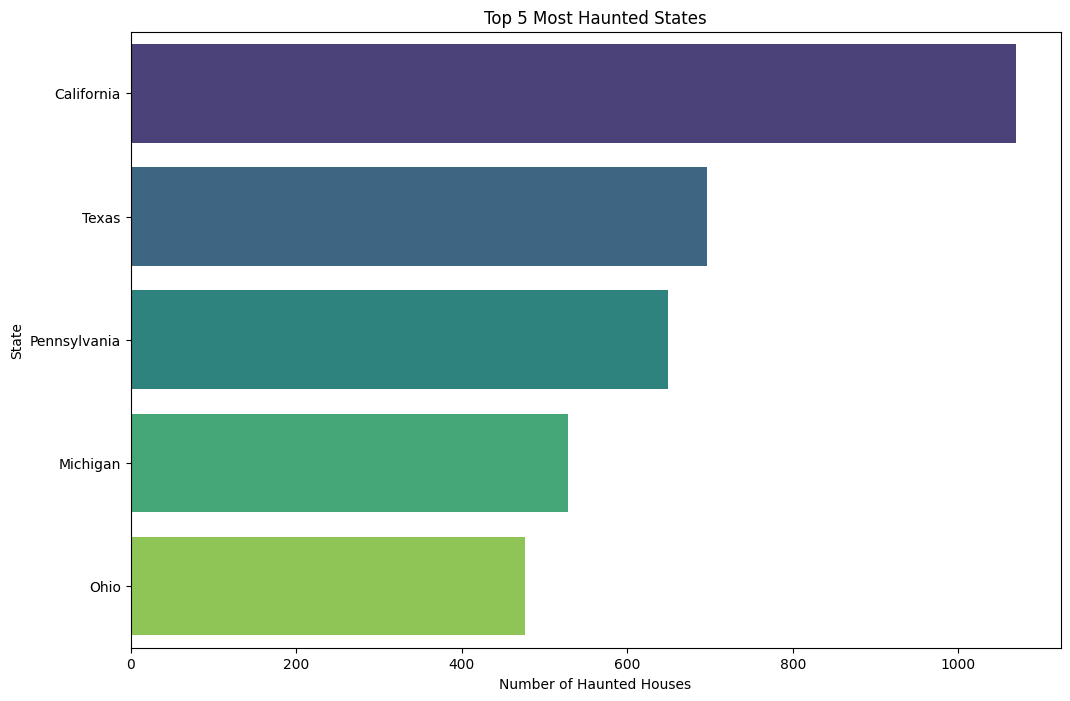

In [786]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

top_5_states = state_counts.nlargest(5, 'count')

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='state', data=top_5_states, palette='viridis')

plt.title('Top 5 Most Haunted States')
plt.xlabel('Number of Haunted Houses')
plt.ylabel('State')
plt.show()

Question 2: Are haunted places more common in urban areas (cities) or rural areas? 

/var/folders/7n/pwv7lvkj7h191ygl7jjl8hpr0000gn/T/ipykernel_1719/3874210269.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_type', y='count', data=area_counts, palette='magma')


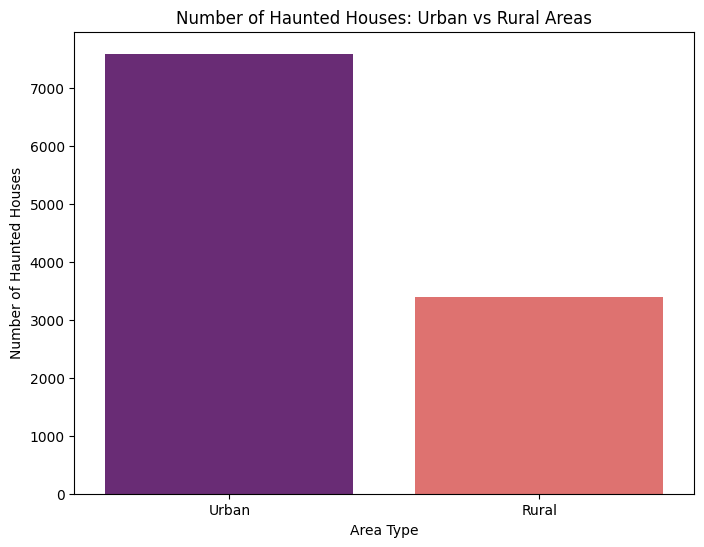

In [787]:
threshold = 0.1

df['distance_from_city_center'] = ((df['latitude'] - df['city_latitude']).abs() + 
                                    (df['longitude'] - df['city_longitude']).abs())

df['area_type'] = df['distance_from_city_center'].apply(lambda x: 'Urban' if x <= threshold else 'Rural')

area_counts = df['area_type'].value_counts().reset_index()
area_counts.columns = ['area_type', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(x='area_type', y='count', data=area_counts, palette='magma')
plt.title('Number of Haunted Houses: Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Haunted Houses')
plt.show()

Question 3: Are there any clusters of haunted places?

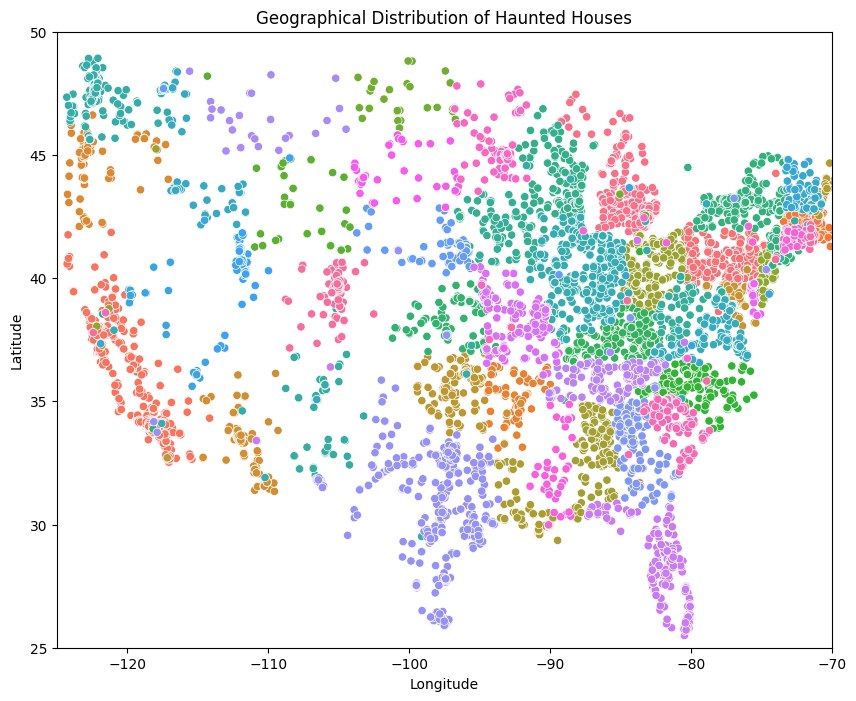

In [788]:
df_zoomed_in = df[(df['latitude'] >= 25) & (df['latitude'] <= 50) &
                  (df['longitude'] >= -125) & (df['longitude'] <= -70)]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df_zoomed_in, hue='state', legend=None)
plt.title('Geographical Distribution of Haunted Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.xlim(-125, -70)
plt.ylim(25, 50)

plt.show()

Question 4: Top 10 Cities with the most haunted places?

/var/folders/7n/pwv7lvkj7h191ygl7jjl8hpr0000gn/T/ipykernel_1719/1686440571.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='haunted_houses', y='city', data=top_10_df, palette='viridis')


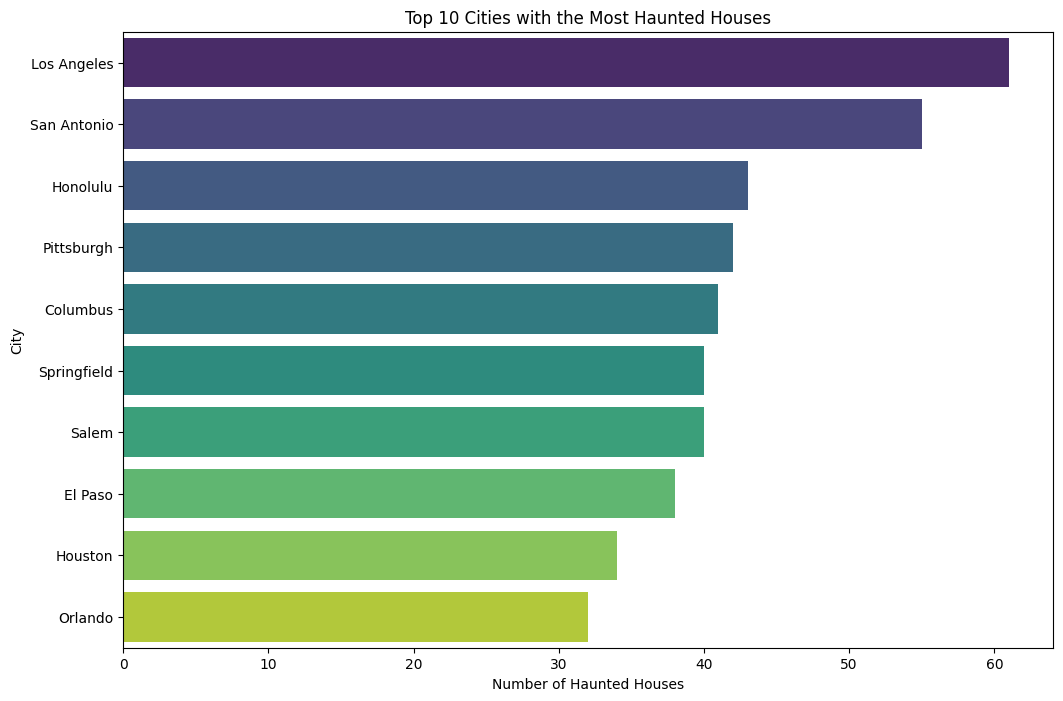

In [789]:
city_counts = df['city'].value_counts()
top_10_cities = city_counts.head(10)
top_10_df = top_10_cities.reset_index()
top_10_df.columns = ['city', 'haunted_houses']

plt.figure(figsize=(12, 8))
sns.barplot(x='haunted_houses', y='city', data=top_10_df, palette='viridis')
plt.title('Top 10 Cities with the Most Haunted Houses')
plt.xlabel('Number of Haunted Houses')
plt.ylabel('City')
plt.show()

Question 5: What are the northernmost, southernmost, easternmost, and westernmost haunted places within California?

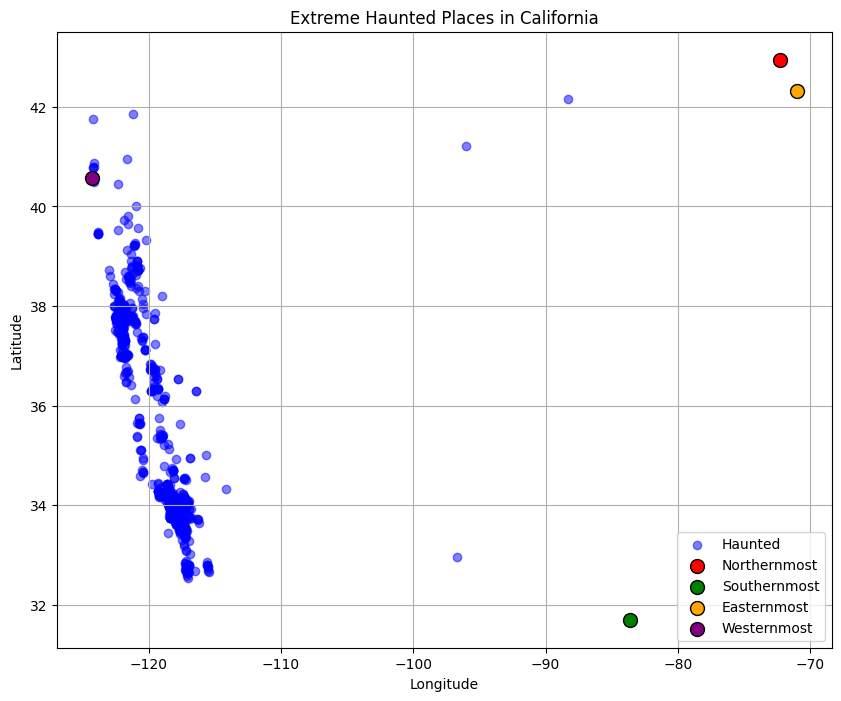

In [790]:
california_df = df[df['state'] == 'California']

northernmost = california_df.loc[california_df['latitude'].idxmax()]
southernmost = california_df.loc[california_df['latitude'].idxmin()]
easternmost = california_df.loc[california_df['longitude'].idxmax()]
westernmost = california_df.loc[california_df['longitude'].idxmin()]

plt.figure(figsize=(10, 8))

plt.scatter(california_df['longitude'], california_df['latitude'], label='Haunted', color='blue', alpha=0.5)
plt.scatter(northernmost['longitude'], northernmost['latitude'], color='red', edgecolor='black', s=100, label='Northernmost')
plt.scatter(southernmost['longitude'], southernmost['latitude'], color='green', edgecolor='black', s=100, label='Southernmost')
plt.scatter(easternmost['longitude'], easternmost['latitude'], color='orange', edgecolor='black', s=100, label='Easternmost')
plt.scatter(westernmost['longitude'], westernmost['latitude'], color='purple', edgecolor='black', s=100, label='Westernmost')

plt.title('Extreme Haunted Places in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

Question 6: What time period was most haunted?

In [791]:
import pandas as pd
import re

def extract_year(description):
    match = re.search(r'\b(\d{4})\b', description)
    if match:
        return int(match.group(1))
    else:
        return None  # Return None if no year is found

df['year'] = df['description'].apply(extract_year)

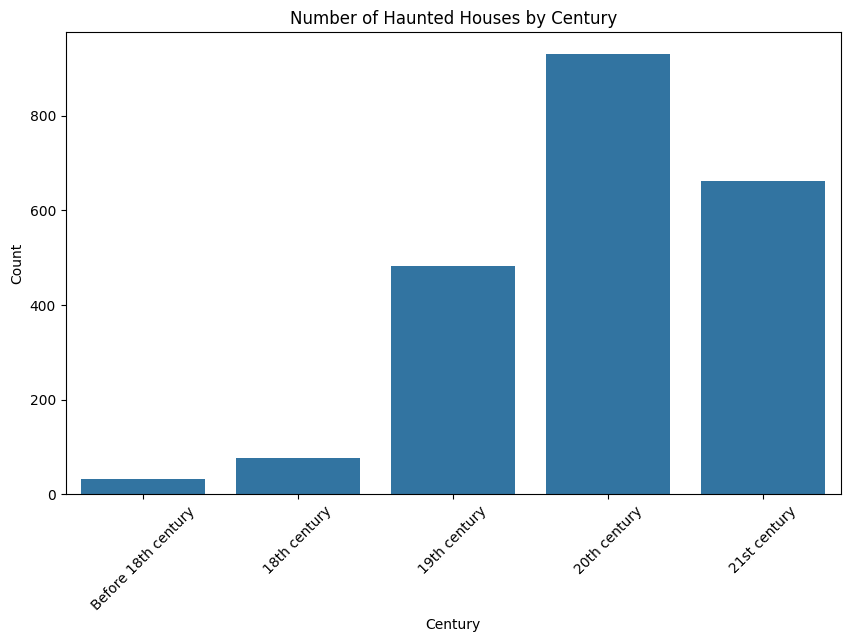

In [792]:
def categorize_century(year):
    if year is None:
        return 'Unknown'
    elif year < 1700:
        return 'Before 18th century'
    elif 1700 <= year < 1800:
        return '18th century'
    elif 1800 <= year < 1900:
        return '19th century'
    elif 1900 <= year < 2000:
        return '20th century'
    elif 2000 <= year:
        return '21st century'
    else:
        return 'Unknown'

df['century'] = df['year'].apply(categorize_century)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='century', order=['Before 18th century', '18th century', '19th century', '20th century', '21st century'])
plt.title('Number of Haunted Houses by Century')
plt.xlabel('Century')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Question 7: What are the least haunted states?

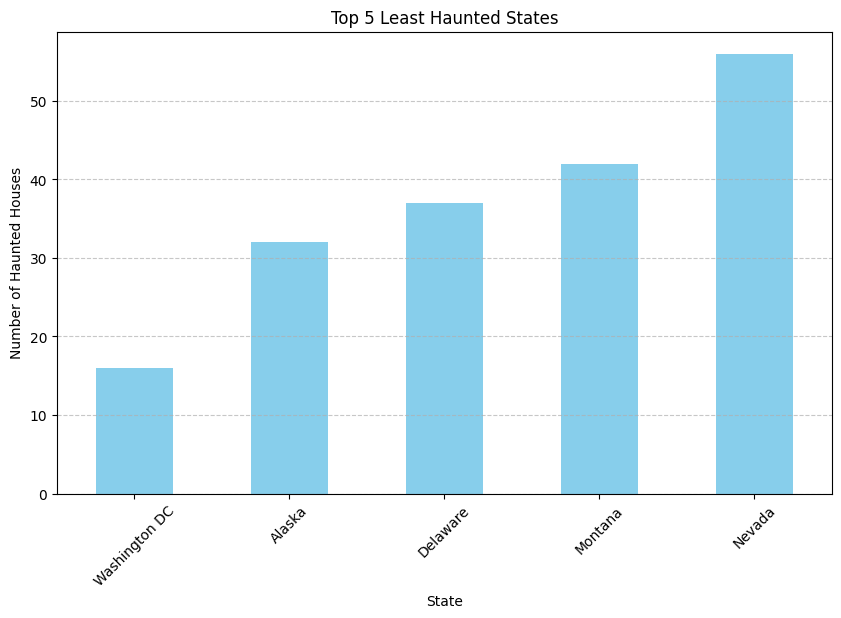

In [793]:
state_counts = df['state'].value_counts()

least_haunted_states = state_counts.nsmallest(5)

plt.figure(figsize=(10, 6))
least_haunted_states.plot(kind='bar', color='skyblue')

plt.title('Top 5 Least Haunted States')
plt.xlabel('State')
plt.ylabel('Number of Haunted Houses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Question 8: How does the number of haunted places in each city compare to the total number of haunted places in the state where the city is located?

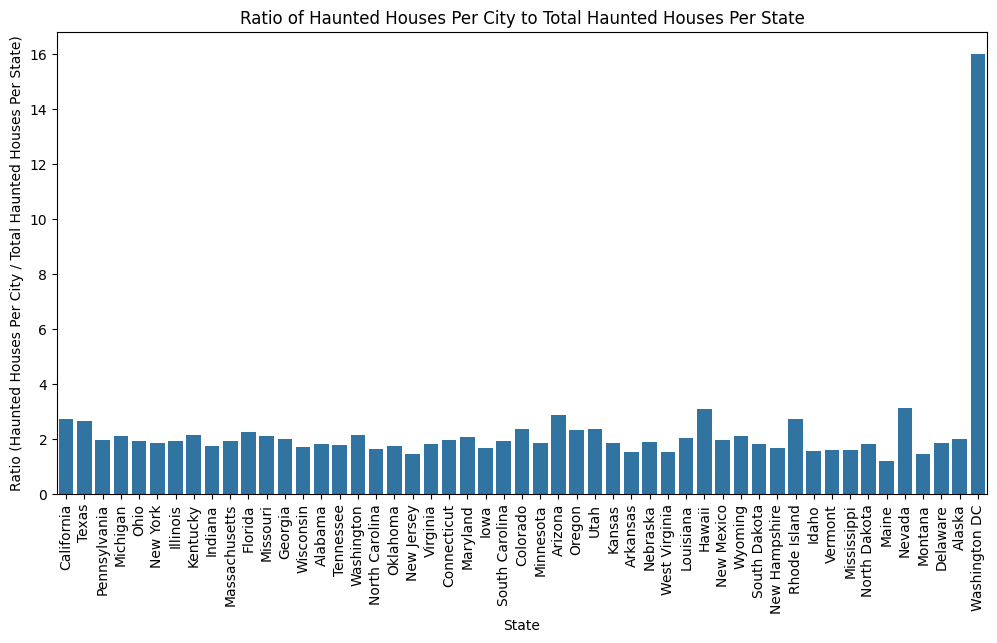

In [794]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'haunted_houses_per_city']

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'total_haunted_houses_per_state']

df = df.merge(state_counts, how='left', on='state')

state_city_counts = df.groupby('state')['city'].nunique().reset_index()
state_city_counts.columns = ['state', 'num_cities']
state_summary = state_counts.merge(state_city_counts, on='state')

state_summary['ratio'] = state_summary['total_haunted_houses_per_state'] / state_summary['num_cities']

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='ratio', data=state_summary)
plt.xticks(rotation=90)
plt.title('Ratio of Haunted Houses Per City to Total Haunted Houses Per State')
plt.xlabel('State')
plt.ylabel('Ratio (Haunted Houses Per City / Total Haunted Houses Per State)')
plt.show()

Question 9:How many haunted hospitals are there in each state?

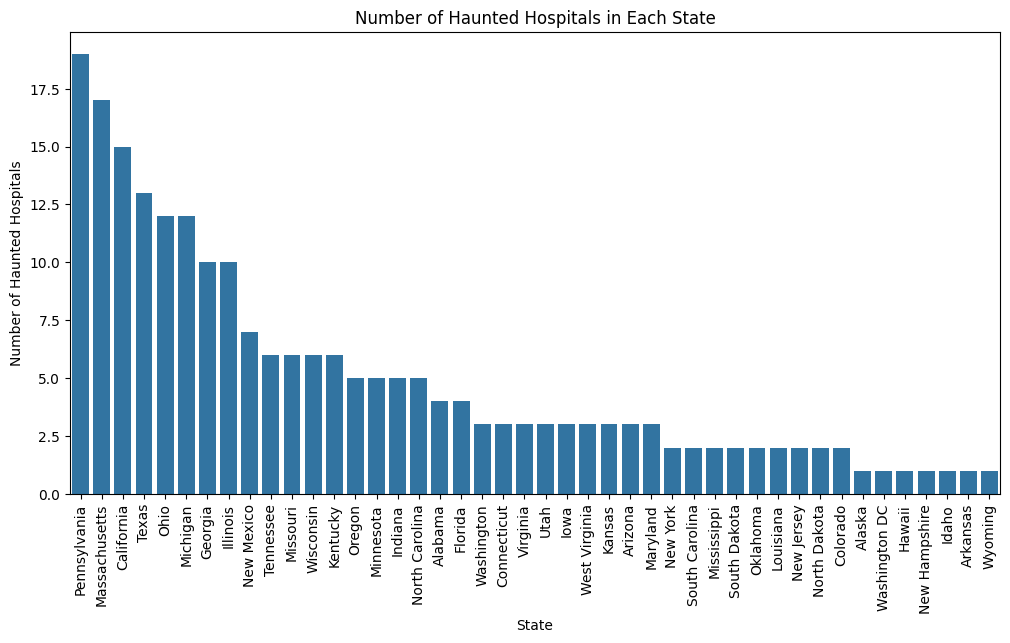

In [795]:
haunted_hospitals_df = df[df['location'].str.contains('Hospital', case=False, na=False)]

hospital_counts = haunted_hospitals_df['state'].value_counts().reset_index()
hospital_counts.columns = ['state', 'number_of_haunted_hospitals']

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='number_of_haunted_hospitals', data=hospital_counts)
plt.xticks(rotation=90)
plt.title('Number of Haunted Hospitals in Each State')
plt.xlabel('State')
plt.ylabel('Number of Haunted Hospitals')
plt.show()

Question 10: What is a distribution of the types of haunted places? 

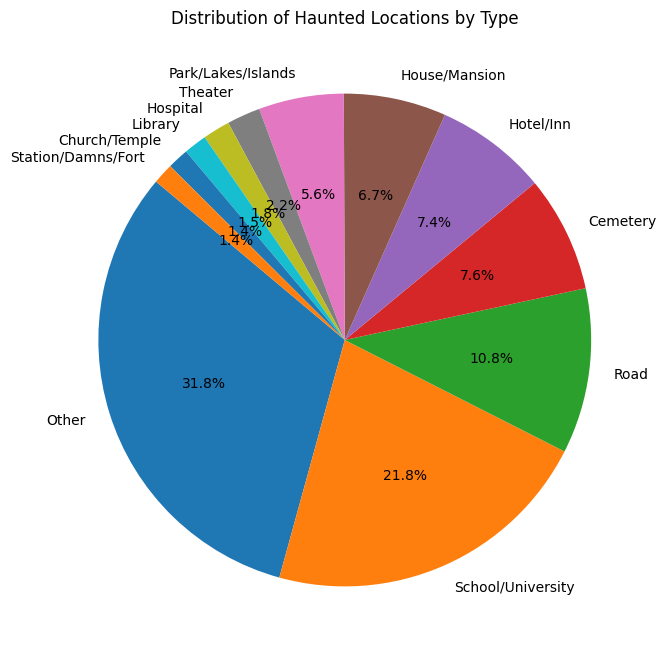

In [796]:
keyword_groups = {
    'Cemetery': ['cemetery', 'yard', 'tomb', 'mortuary'],
    'School/University': ['school', 'university', 'college', 'lab', 'hall', 'elementary', 'dormitory', 'high'],
    'Library': ['library', 'museum', 'books'],
    'Road': ['road', 'rd', 'bridge', 'street', 'streets', 'rd.', 'hwy', 'drive', 'tunnels'],
    'Hotel/Inn': ['hotel', 'inn', 'lodge', 'motel', 'tavern', 'cabin', 'ballroom', 'bar', 'restaurant', 'eatery'],
    'Church/Temple': ['church', 'temple'],
    'House/Mansion': ['house', 'mansion', 'apartments', 'village', 'estate', 'manor', 'condos', 'apartment'],
    'Theater': ['theater', 'cinema', 'auditorium', 'theatre', 'cinemas'],
    'Hospital': ['hospital', 'senior center'],
    'Park/Lakes/Islands': ['park', 'lakes', 'island', 'pond', 'woods', 'ave.', 'ave', 'lake', 'swamp'],
    'Station/Damns/Fort': ['station', 'dams', 'fort', 'factory', 'barracks', 'mine']
}

def categorize_location(location_name):
    if isinstance(location_name, str): 
        location_name = location_name.lower() 
        for category, keywords in keyword_groups.items():
         
            if any(keyword.lower() in location_name for keyword in keywords):
                return category
    return 'Other'  

df['location_category'] = df['location'].apply(categorize_location)

category_counts = df['location_category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Haunted Locations by Type')
plt.show()